# Работа с библиотекой Pandas

### 1. DataFrame

In [703]:
import pandas as pd

df = pd.DataFrame({'numbers':range(10), 'chars':['a']*10})

df

,numbers,chars
0,0,a
1,1,a
2,2,a
3,3,a
4,4,a
5,5,a
6,6,a
7,7,a
8,8,a
9,9,a


### 2. Чтение данных с csv файла

In [704]:
ds_df = pd.read_csv('../data/dataset.csv', header=0, sep='\t')

ds_df

,Name,Birth,City,Position
0,Иванов А.А.,22.03.1980,Москва,NaN
1,Сорокин И.В.,07.08.1965,Волгоград,инженер
2,Белов М.М.,13.02.1980,Ростов,менеджер
3,Мельникова Д.С.,15.04.1985,Ростов,NaN
4,Рыбина Е.П.,19.11.1985,Москва,инженер
5,Костров С.О.,31.05.1985,Москва,стажер


In [705]:
ds_df.columns

Index(['Name', 'Birth', 'City', 'Position'], dtype='object')

In [706]:
ds_df.shape

(6, 4)

### 3. Добавление строки

In [707]:
ds_df = ds_df._append({'Name':'Perov', 'Birth':'22.03.1990', 'City':'Penza'}, ignore_index=True) # type: ignore

ds_df

,Name,Birth,City,Position
0,Иванов А.А.,22.03.1980,Москва,NaN
1,Сорокин И.В.,07.08.1965,Волгоград,инженер
2,Белов М.М.,13.02.1980,Ростов,менеджер
3,Мельникова Д.С.,15.04.1985,Ростов,NaN
4,Рыбина Е.П.,19.11.1985,Москва,инженер
5,Костров С.О.,31.05.1985,Москва,стажер
6,Perov,22.03.1990,Penza,NaN


### 4. Добавление столбца

In [708]:
ds_df['IsStudent'] = [False]*5 + [True]*2
ds_df['Test'] = 'test'

ds_df

,Name,Birth,City,Position,IsStudent,Test
0,Иванов А.А.,22.03.1980,Москва,NaN,False,test
1,Сорокин И.В.,07.08.1965,Волгоград,инженер,False,test
2,Белов М.М.,13.02.1980,Ростов,менеджер,False,test
3,Мельникова Д.С.,15.04.1985,Ростов,NaN,False,test
4,Рыбина Е.П.,19.11.1985,Москва,инженер,False,test
5,Костров С.О.,31.05.1985,Москва,стажер,True,test
6,Perov,22.03.1990,Penza,NaN,True,test


### 5. Удаление строк

In [709]:
ds_df = ds_df.drop([5,6], axis=0)

ds_df

,Name,Birth,City,Position,IsStudent,Test
0,Иванов А.А.,22.03.1980,Москва,NaN,False,test
1,Сорокин И.В.,07.08.1965,Волгоград,инженер,False,test
2,Белов М.М.,13.02.1980,Ростов,менеджер,False,test
3,Мельникова Д.С.,15.04.1985,Ростов,NaN,False,test
4,Рыбина Е.П.,19.11.1985,Москва,инженер,False,test


### 6. Удаление столбцов

In [710]:
ds_df.drop(['IsStudent', 'Test'], axis=1, inplace=True)

ds_df

,Name,Birth,City,Position
0,Иванов А.А.,22.03.1980,Москва,NaN
1,Сорокин И.В.,07.08.1965,Волгоград,инженер
2,Белов М.М.,13.02.1980,Ростов,менеджер
3,Мельникова Д.С.,15.04.1985,Ростов,NaN
4,Рыбина Е.П.,19.11.1985,Москва,инженер


### 7. Запись данных в файл

In [711]:
ds_df.to_csv('../data/updated_dataset.csv', sep=',', header=True, index=False)

### 8. Типы столбцов

In [712]:
ds_df.dtypes

Name        object
Birth       object
City        object
Position    object
dtype: object

### 9. Изменение типа столбца

In [713]:
ds_df.Birth = ds_df.Birth.apply(pd.to_datetime)

C:\Users\azizk\AppData\Local\Temp\ipykernel_7036\4279640354.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ds_df.Birth = ds_df.Birth.apply(pd.to_datetime)


In [714]:
ds_df.dtypes

Name                object
Birth       datetime64[ns]
City                object
Position            object
dtype: object

### 10. Информация о DataFrame

In [715]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      5 non-null      object        
 1   Birth     5 non-null      datetime64[ns]
 2   City      5 non-null      object        
 3   Position  3 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 292.0+ bytes


### 11. Заполнение пустых данных

In [716]:
ds_df.fillna('разнорабочий', inplace=True)

ds_df

,Name,Birth,City,Position
0,Иванов А.А.,1980-03-22,Москва,разнорабочий
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
2,Белов М.М.,1980-02-13,Ростов,менеджер
3,Мельникова Д.С.,1985-04-15,Ростов,разнорабочий
4,Рыбина Е.П.,1985-11-19,Москва,инженер


### 12. Выборка

In [717]:
ds_df.Position

0    разнорабочий
1         инженер
2        менеджер
3    разнорабочий
4         инженер
Name: Position, dtype: object

In [718]:
ds_df[['Name', 'Position']]

,Name,Position
0,Иванов А.А.,разнорабочий
1,Сорокин И.В.,инженер
2,Белов М.М.,менеджер
3,Мельникова Д.С.,разнорабочий
4,Рыбина Е.П.,инженер


In [719]:
ds_df[:3]

,Name,Birth,City,Position
0,Иванов А.А.,1980-03-22,Москва,разнорабочий
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
2,Белов М.М.,1980-02-13,Ростов,менеджер


In [720]:
ds_df[-3:]

,Name,Birth,City,Position
2,Белов М.М.,1980-02-13,Ростов,менеджер
3,Мельникова Д.С.,1985-04-15,Ростов,разнорабочий
4,Рыбина Е.П.,1985-11-19,Москва,инженер


In [721]:
ds_df.loc[[1,3,4], ["Name", "City"]]

,Name,City
1,Сорокин И.В.,Волгоград
3,Мельникова Д.С.,Ростов
4,Рыбина Е.П.,Москва


In [722]:
ds_df.iloc[[1,3,4], [0,1]] 

,Name,Birth
1,Сорокин И.В.,1965-07-08
3,Мельникова Д.С.,1985-04-15
4,Рыбина Е.П.,1985-11-19


In [723]:
ds_df[(ds_df.Birth >= pd.to_datetime('1985-1-1')) & (ds_df.City != 'Москва')]

,Name,Birth,City,Position
3,Мельникова Д.С.,1985-04-15,Ростов,разнорабочий


In [724]:
ds_df[(ds_df.Birth >= pd.to_datetime('1985-1-1')) | (ds_df.City == 'Волгоград')]

,Name,Birth,City,Position
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
3,Мельникова Д.С.,1985-04-15,Ростов,разнорабочий
4,Рыбина Е.П.,1985-11-19,Москва,инженер


### 13. Визуализация данных

<Axes: xlabel='Name'>

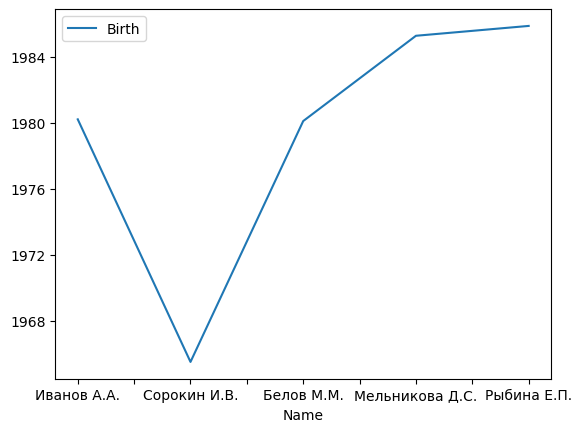

In [725]:
ds_df.plot(x='Name', y='Birth')

### 14. Загрузка данных с бд PostgreSQL

In [726]:
import os
from dotenv import load_dotenv
import psycopg

load_dotenv()

with psycopg.connect(
    dbname=os.getenv("POSTGRESQL_DB"), 
    user=os.getenv("POSTGRESQL_USER"),
    password=os.getenv("POSTGRESQL_PWD"),
    host=os.getenv("POSTGRESQL_HOST")
) as conn:
    data = pd.read_sql_query(
        '''
            select
                (u.first_name || ' ' || u.last_name) user_name, 
                coalesce(t.likes_count, 0) likes_count
            from
                users u
            left join
                (
                    select 
                        user_id, count(*) likes_count
                    from
                        likes
                    group by 
                        user_id
                ) t
                on t.user_id = u.id; 
        ''',
        conn
    )
        

data

C:\Users\azizk\AppData\Local\Temp\ipykernel_7036\2241886265.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(


,user_name,likes_count
0,Test3 Test3,2
1,Test5 Test5,2
2,Test4 Test4,1
3,Test2 Test2,4
4,Test6 Test6,0
5,Test#1 Test#1,0


<Axes: xlabel='user_name'>

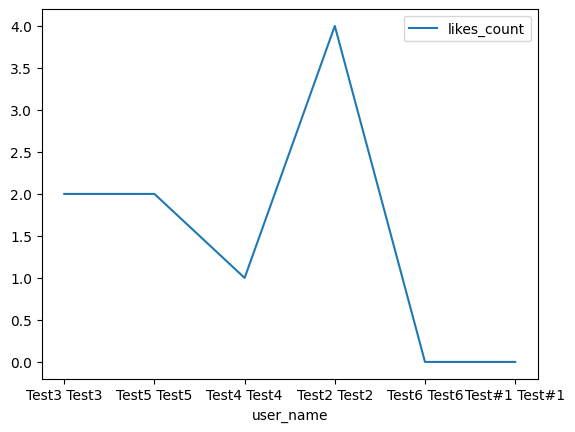

In [727]:
data.plot(x='user_name', y='likes_count')